## **A. Pendahuluan**

### **Deskripsi Dataset**


1. Nama Dataset: hotel.csv
2. Sumber Dataset: https://www.sciencedirect.com
3. Tahun Pengumpulan: 2018
4. Ukuran: 119390 baris x 32 kolom




### **Alasan Dataset Menarik**



1. Data dari dunia nyata yang lengkap
2. Cocok untuk berbagai jenis analisis
3. Sempurna untuk binary classification
4. Time series elements yang kuat
5. Business impact yang tinggi
6. Perspektif dari berbagai negara
7. Tantangan data yang realistis
8. Relevan untuk akademis



### **Pertanyaan/tujuan analisis**

1. Bagaimana hubungan antara bulan, lead time, ADR, dan Total Nights?
2. Bagaimana trend total malam menginap hotel berubah dari tahun ke tahun? Apakah terjadi pertumbuhan atau penurunan?
3. Bagaimana trend total perubahan pemesanan (booking changes) dari tahun ke tahun? Apakah terjadi kenaikan atau penurunan?
4. Tipe customer mana yang memiliki ADR yang paling tinggi?
5. Apakah ada pola cluster alami ketika data direduksi menjadi 2 PC

## **B. Setup & Package**

### **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tabulate import tabulate

### **Path File**

In [2]:
path = "https://raw.githubusercontent.com/neni1705/FinalProject_DataWrangling_2025/488de37a5a559275194d62baa48812ce69d2307c/Dataset/Hotel%20dataset/hotels.csv"

### **Penjelasan Fungsi Paket**



*   **pandas** : Load, clean, transform, analisis data tabular
*   **matplotlib.pyplot** : Membuat plot, grafik, chart statis
*   **seaborn** : Plot lebih estetis dengan warna built-in, visualisasi distribusi, heatmap, pairplot
*   **sklearn.decomposition.PCA** : Reduksi dimensi, mengurangi jumlah variabel dengan menjaga informasi penting
*   **sklearn.preprocessing.RobustScaler** : Normalisasi data menggunakan median & IQR
*   **sklearn.preprocessing.OneHotEncoder** : Mengubah kategori menjadi kolom biner
*   **sklearn.compose.ColumnTransformer** : Menerapkan transformasi berbeda ke subset kolom
*   **StandardScaler** : Standardisasi data numerik
*   **LabelEncoder** : Mengubah label kategorik menjadi angka
*   **tabulate** : Mengubah data biasa (list, dictionary, DataFrame) menjadi tabel dengan format profesional.



## **C. Data preparation**

### **Import Dataset**

In [3]:
df = pd.read_csv(path)

df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Data Cleaning & Data Wrangling**

#### **Handling Missing Value**

In [6]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [7]:
df_copi = df.copy()

In [8]:
df_copi['arrival_date_day_of_month']

,arrival_date_day_of_month
0,1
1,1
2,1
3,1
4,1
...,...
119385,30
119386,31
119387,31
119388,31


In [9]:
categorical_cols = ['hotel','is_canceled','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status', 'company', 'agent']
df_copi_categorical=df_copi[categorical_cols]
df_copi_categorical.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'company',
       'agent'],
      dtype='object')

In [10]:
df_copi_numerical=df_copi.drop(columns=categorical_cols + ['reservation_status_date'])
df_copi_numerical.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [11]:
df_copi_numerical.shape

(119390, 13)

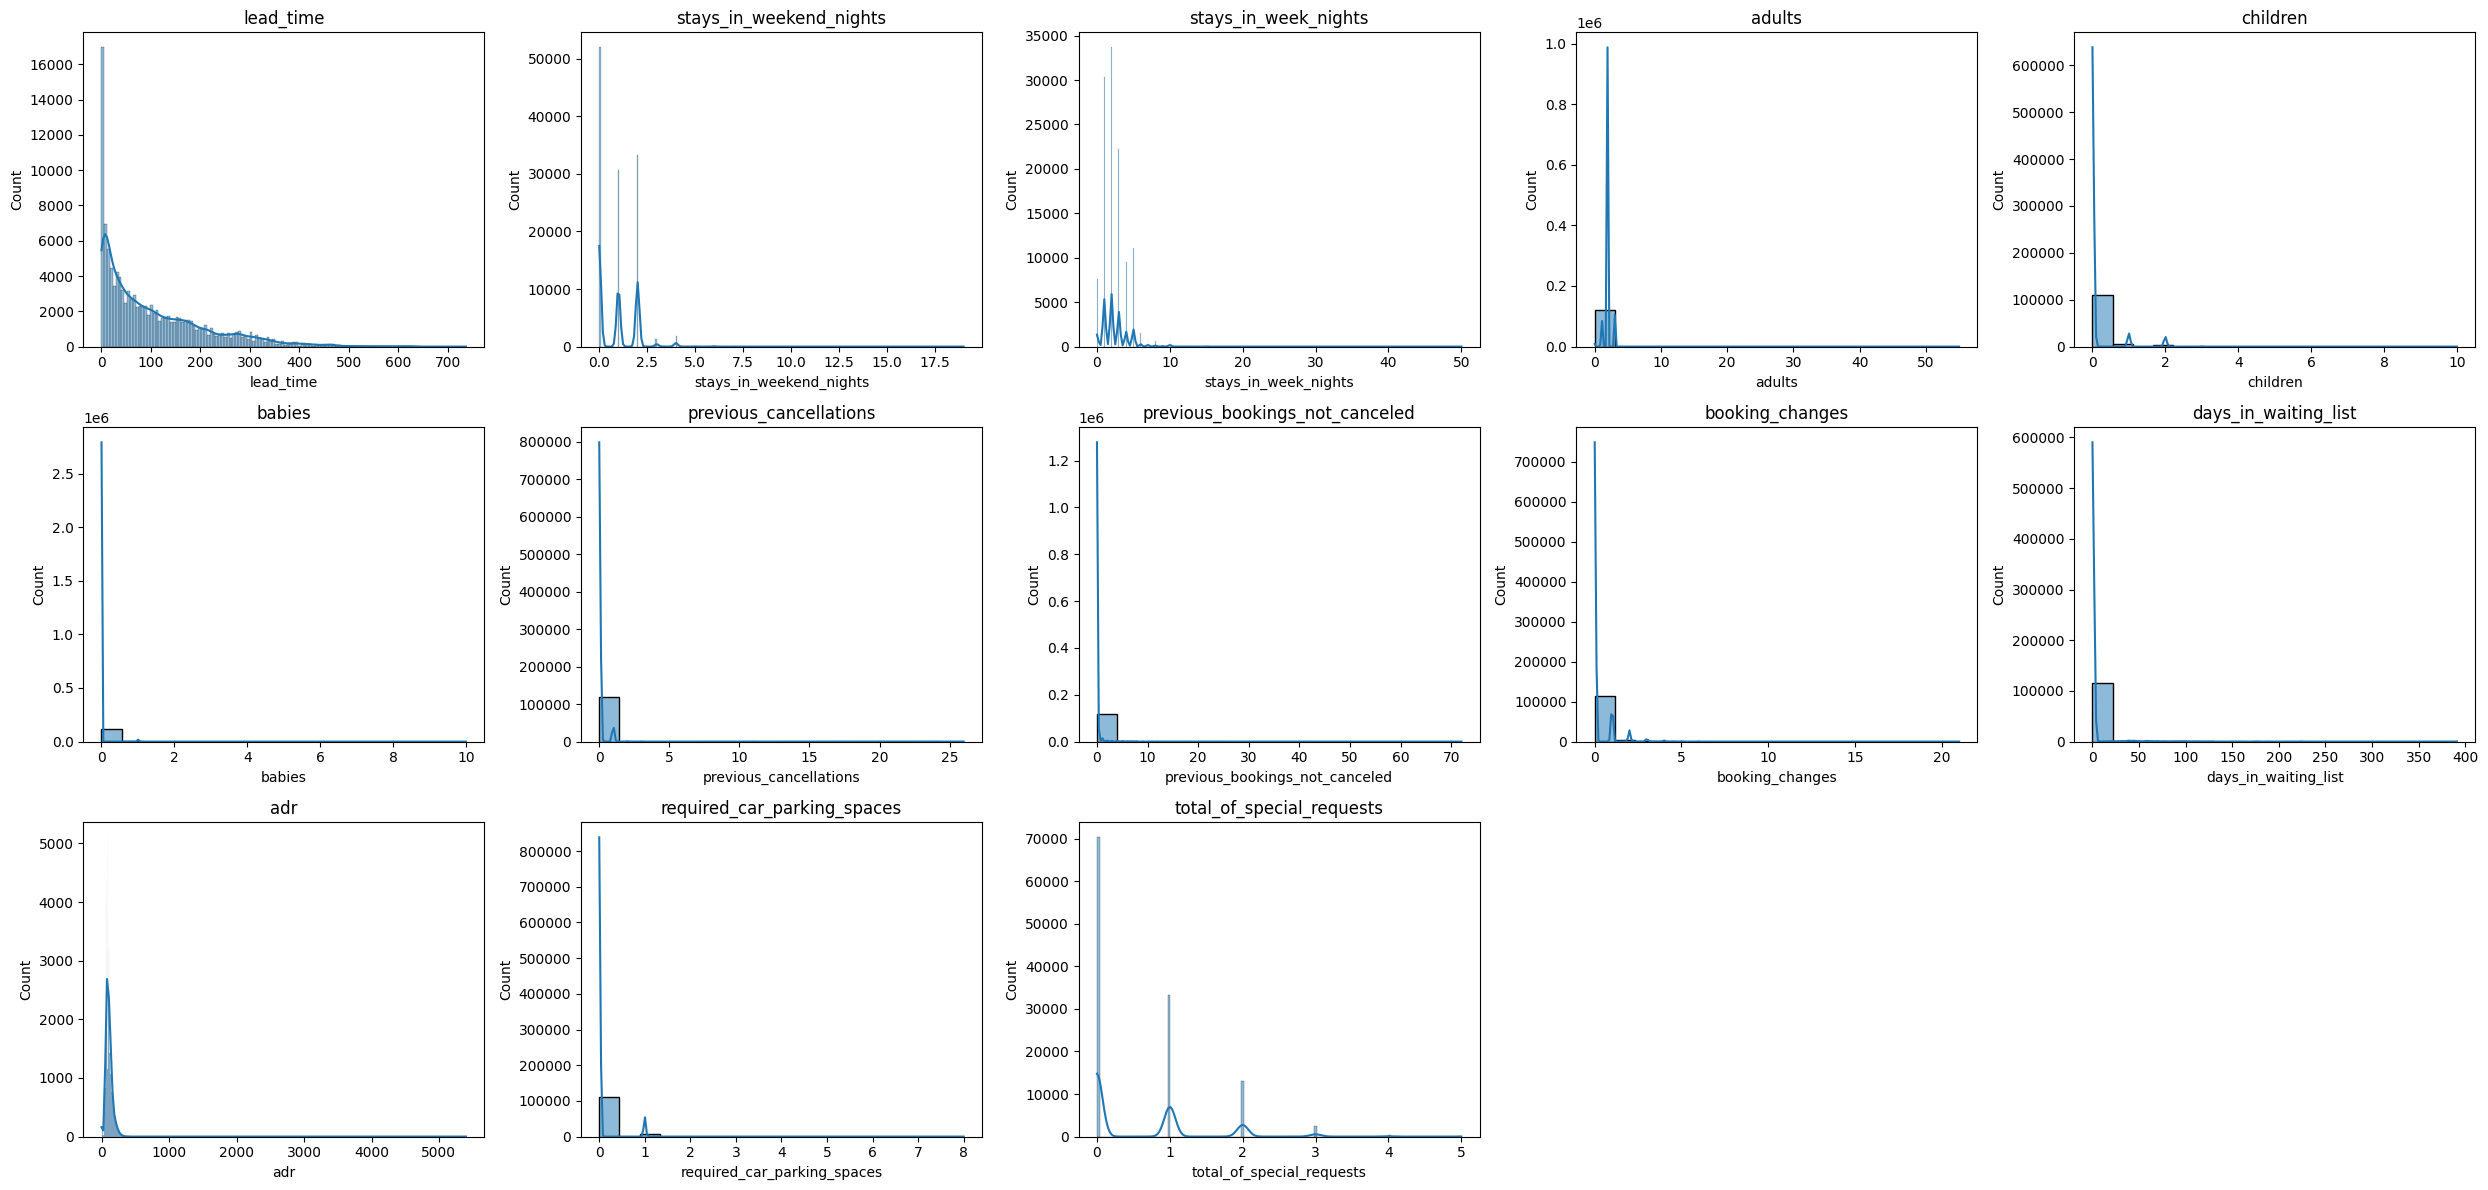

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(25, 12))
axes = axes.flatten()

for i, col in enumerate(df_copi_numerical.columns):
    data_col = df_copi_numerical[col].dropna()
    sns.histplot(data_col, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Matikan axis pada slot kosong
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

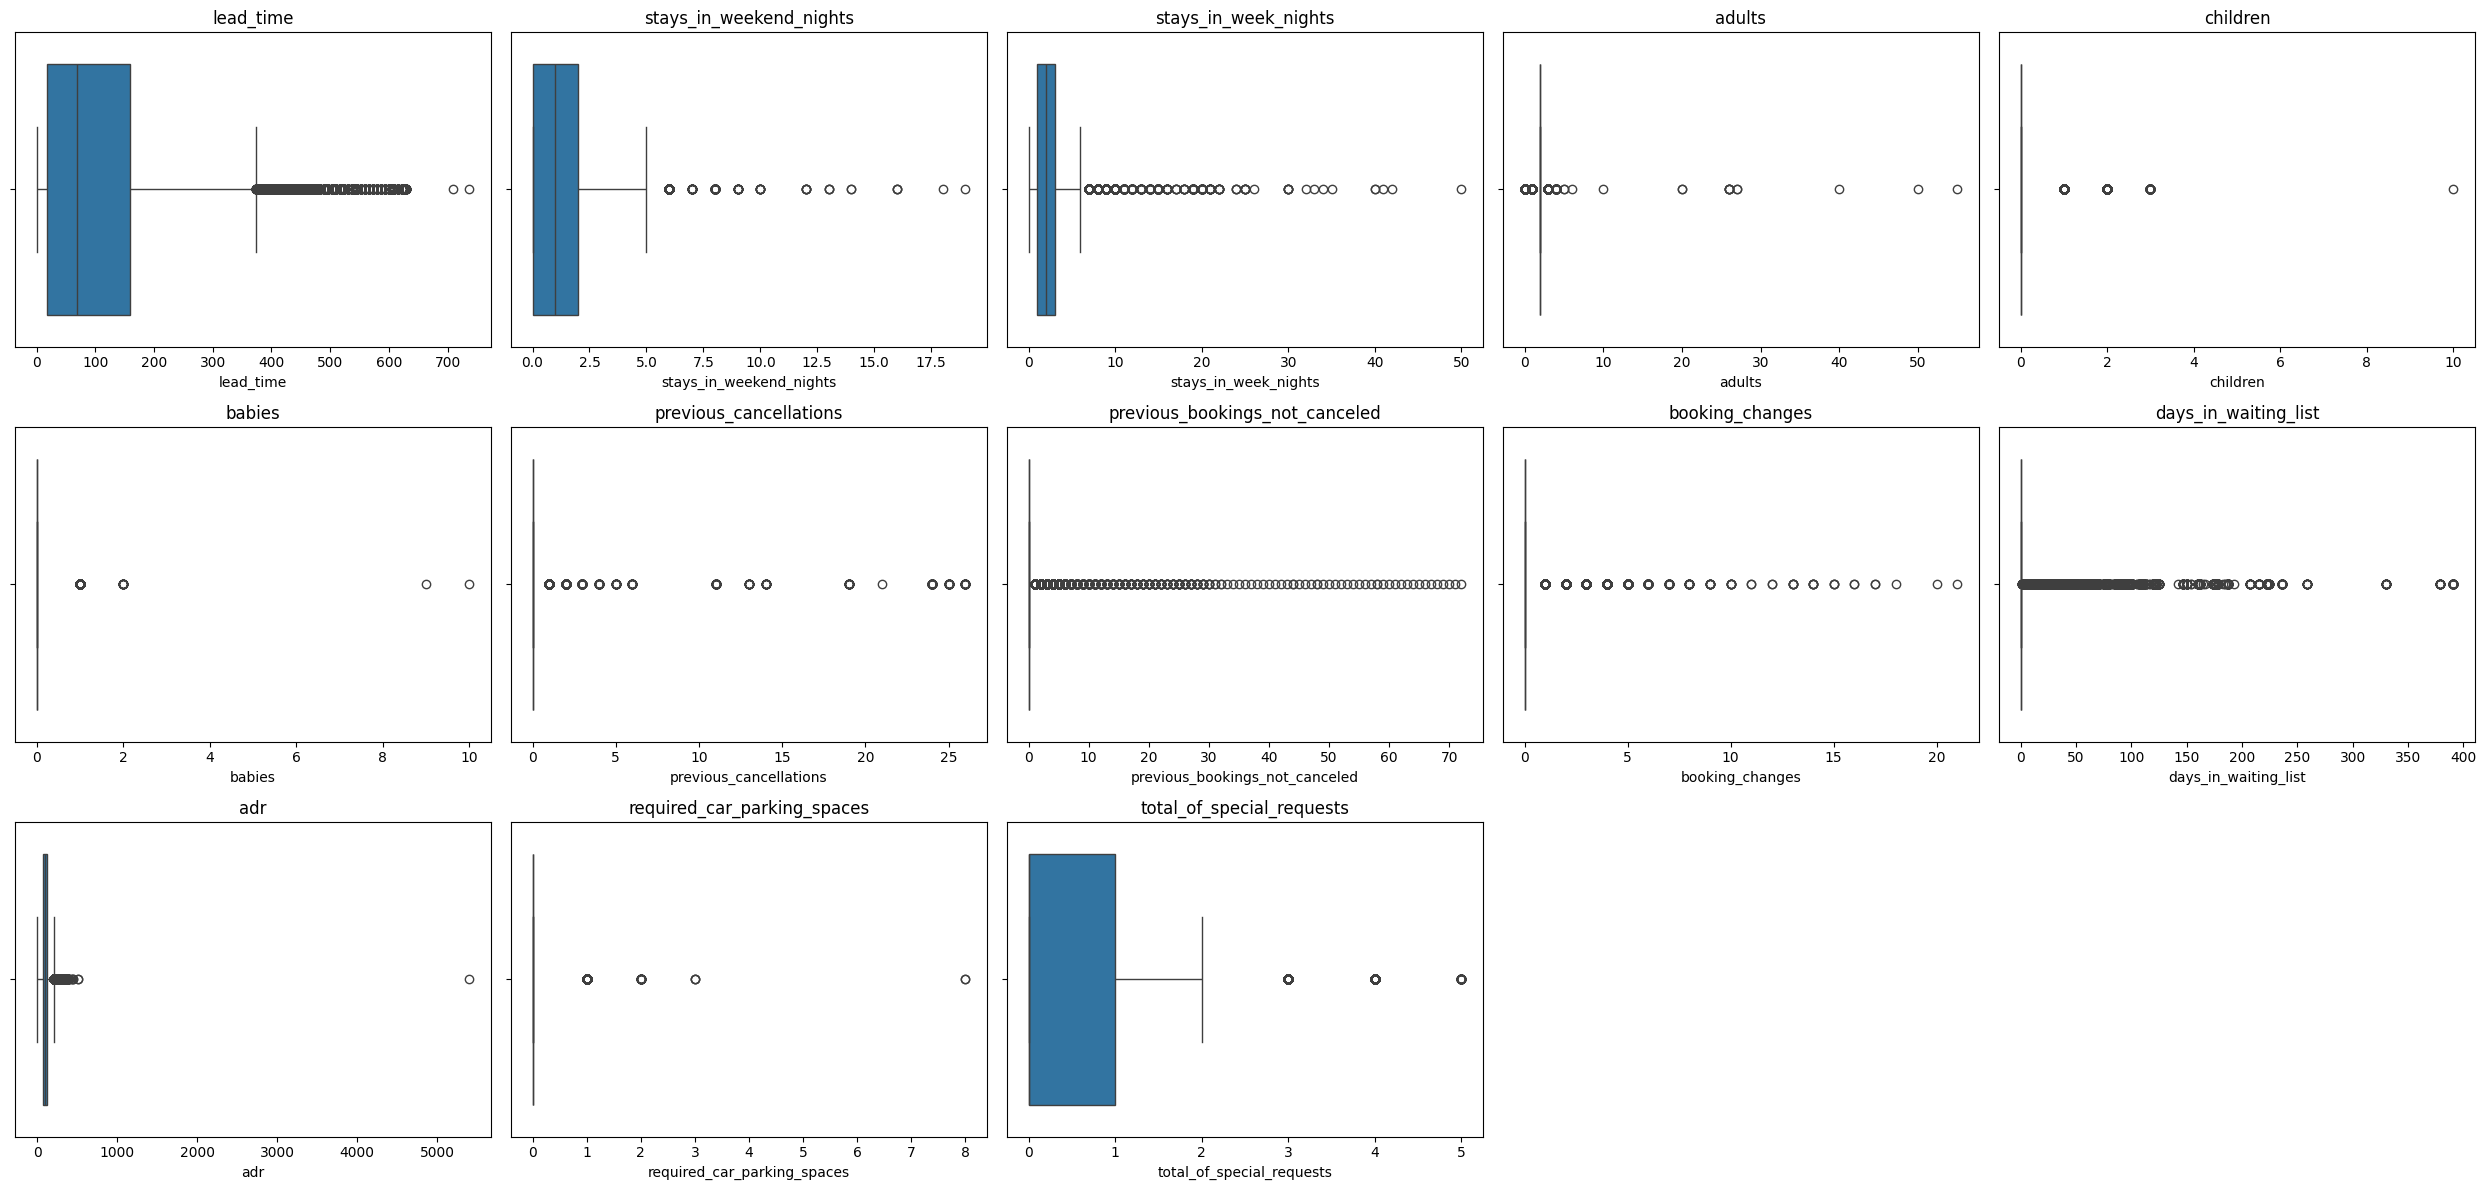

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(25, 12))
axes = axes.flatten()

for i, col in enumerate(df_copi_numerical.columns):
    data_col = df_copi_numerical[col].dropna()
    sns.boxplot(data_col, ax=axes[i], orient='h')
    axes[i].set_title(col)

# Matikan axis pada slot kosong
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# drop missing value kolom children karena jumlah NA sedikit
df_copi=df_copi.dropna(subset='children')
print(f'Jumlah missing values children: {df_copi['children'].isnull().sum()}')

Jumlah missing values children: 0


In [15]:
# Imputasi kolom country dengan modus karena termasuk kolom kategorik
modus_country=df_copi['country'].mode().iloc[0]
print(f"Modus country: {modus_country}")

# Imputasi missing values dengan modus
df_copi['country'] = df_copi['country'].fillna(modus_country)

print("\nSetelah imputasi country dengan modus:")
print(f"Jumlah missing values country: {df_copi['country'].isnull().sum()}")
print(f"Distribusi country setelah imputasi:")
print(df_copi['country'].value_counts())

Modus country: PRT

Setelah imputasi country dengan modus:
Jumlah missing values country: 0
Distribusi country setelah imputasi:
country
PRT    49074
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64


In [16]:
# Imputasi missing values dengan angka 0
df_copi['agent'] = df_copi['agent'].fillna(0)

print("\nSetelah imputasi agent dengan angka 0:")
print(f"Jumlah missing values agent: {df_copi['agent'].isnull().sum()}")


Setelah imputasi agent dengan angka 0:
Jumlah missing values agent: 0


In [17]:
# Imputasi missing values dengan angka 0
df_copi['company'] = df_copi['company'].fillna(0)

print("\nSetelah imputasi company dengan angka 0:")
print(f"Jumlah missing values company: {df_copi['company'].isnull().sum()}")


Setelah imputasi company dengan angka 0:
Jumlah missing values company: 0


### **Data Wrangling**

#### **Fix Data Types**

In [18]:
df_copi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

In [19]:
df_copi['children'] = df_copi['children'].astype(int)
df_copi['agent'] = df_copi['agent'].astype(int)
df_copi['company'] = df_copi['company'].astype(int)
df_copi['reservation_status_date'] = pd.to_datetime(df_copi['reservation_status_date'])

#### **Remove Invalid Data**

In [20]:
# 1.Tamu dengan adults=0 dan ada children/babies -> tidak logis
invalid_guests=df_copi[(df_copi['adults']==0)&((df_copi['children']>0) | (df_copi['babies']>0))]
print(f'Invalid guestes records: {len(invalid_guests)} baris')
df_copi=df_copi[~((df_copi['adults']==0)&((df_copi['children']==0)|(df_copi['babies']>0)))]

# 2. ADR (average daily rate) negatif atau 0 -> tidak logis
invalid_adr=df_copi[df_copi['adr']<=0]
df_copi=df_copi[df_copi['adr']>0]

Invalid guestes records: 223 baris


#### **Feature Engineering**

In [21]:
# 1. Total nights stayed
df_copi['total_nights'] = df_copi['stays_in_weekend_nights'] + df_copi['stays_in_week_nights']
# 2. Total guests
df_copi['total_guests'] = df_copi['adults'] + df_copi['children'] + df_copi['babies']
# 3. Family indicator
df_copi['is_family'] = ((df_copi['children'] > 0) | (df_copi['babies'] > 0)).astype(int)
# 4. Business traveler indicator (solo traveler, weekday stay)
df_copi['is_business_traveler'] = ((df_copi['adults'] == 1) &
                               (df_copi['children'] == 0) &
                               (df_copi['babies'] == 0) &
                               (df_copi['stays_in_week_nights'] > 0)).astype(int)
# 5. Has special requests
df_copi['has_special_requests'] = (df_copi['total_of_special_requests'] > 0).astype(int)

In [22]:
# Date Feature Engineering

# 1. Create arrival date as datetime
months_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_copi['arrival_date_month_num'] = df_copi['arrival_date_month'].map(months_dict)

# 2. Create customer type as integer
customer_type_map = {
    'Transient': 1,
    'Transient-Party': 2,
    'Contract': 3,
    'Group': 4
}
df_copi['customer_type_num'] = df_copi['customer_type'].map(customer_type_map)

In [23]:
# Year Feature Engineering

df_copi['reservation_year']=df_copi['reservation_status_date'].dt.year

In [24]:
df_copi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117392 entries, 2 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117392 non-null  object        
 1   is_canceled                     117392 non-null  int64         
 2   lead_time                       117392 non-null  int64         
 3   arrival_date_year               117392 non-null  int64         
 4   arrival_date_month              117392 non-null  object        
 5   arrival_date_week_number        117392 non-null  int64         
 6   arrival_date_day_of_month       117392 non-null  int64         
 7   stays_in_weekend_nights         117392 non-null  int64         
 8   stays_in_week_nights            117392 non-null  int64         
 9   adults                          117392 non-null  int64         
 10  children                        117392 non-null  int64       

In [25]:
df_clean=df_copi.copy()

### **Penjelasan Langkah Cleaning dan Data Wrangling**

### **Cleaning Datas**
#### **Handling Missing Values**
1. Menghapus baris yang kosong di kolom children karena jumlahnya kecil sehingga tidak memengaruhi distribusi dan tidak kehilangan beberapa informasi yang banyak
2. Imputasi modus di kolom country karena merupakan kolom kategorik dengan persentase missing value sebesar 0.4% dan agar menjaga distribusi asli
3. Imputasi angka 0 di kolom agent dan company karena untuk mempertahankan informasi dengan angka 0 sebagai booking/memesan tanpa bantuan dari agen

### **Data Wrangling**
#### **Fixing Data Types**
1. kolom children harus integer/bilangan bulat karena jumlah anak harus bilang bulat dan konsistensi analisis numerik
2. kolom agent harus integer/bilangan bulat karena jumlah ID agen harus bilangan bulat dan konsistensi analisis numerik
3. kolom compant harus integer/bilangan bulat karena jumlah ID company harus bilangan bulat dan konsistensi analisis numerik

#### **Removing Invalid/Illogical Data**
1. Menghapus baris yang dimana adults (orang dewasa) jumlahnya 0, tetapi terdapat child (anak-anak) dan babies (bayi) untuk booking/memesan
2. Menghapus ADR (pendapatan rata-rata per hari) yang jumlahnya kurang dari 0 karena pendapatan tidak mungkin 0 atau negatif dan akan mengacaukan analisis

#### **Basic Guest Features**
1. Menambahkan kolom baru bernama total_nights dengan menjumlahkan kolom stays_in_weekend_nights dan stays_in_week_nights
2. Menambahkan kolom baru bernama total_guests dengan menjumlahkan kolom adults, children, dan babies
3. Menambahkan kolom baru bernama is_family dengan filter kolom children atau kolom babies yang lebih dari 0 yang artinya mempunyai keluarga atau tidak

#### **Date**
1. Membuat kolom baru bernama arrival_date_month_num dengan mapping value di kolom arrival_date_month
2. Membuat kolom baru bernama customer_type_num dengan mapping value di customer_type_map
3. Membuat kolom baru bernama reservation_year dengan mengekstrak Year (tahun) dari kolom reservation_status_date

### **Standardisasi dan Transformasi**

Melakukan standarisasi agar skala data sama sehingga dapat meningkatkan kinerja dari model yang distance based

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117392 entries, 2 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117392 non-null  object        
 1   is_canceled                     117392 non-null  int64         
 2   lead_time                       117392 non-null  int64         
 3   arrival_date_year               117392 non-null  int64         
 4   arrival_date_month              117392 non-null  object        
 5   arrival_date_week_number        117392 non-null  int64         
 6   arrival_date_day_of_month       117392 non-null  int64         
 7   stays_in_weekend_nights         117392 non-null  int64         
 8   stays_in_week_nights            117392 non-null  int64         
 9   adults                          117392 non-null  int64         
 10  children                        117392 non-null  int64       

In [27]:
X = df_clean.drop(columns=['is_canceled'])
y = df_clean['is_canceled']

new_categorical_cols = [col for col in categorical_cols if col != 'is_canceled']

X_categorical = X[new_categorical_cols]
X_numerical = X.drop(columns=new_categorical_cols + ['reservation_status_date'])

ct = ColumnTransformer(
    transformers=[
        ('oh', OneHotEncoder(sparse_output=False), X_categorical.columns),
        ('scaler', StandardScaler(), X_numerical.columns),
    ], remainder='drop'
)

X_transformed = ct.fit_transform(X)

X_transformed

array([[ 0.        ,  1.        ,  1.        , ...,  0.1473151 ,
        -0.53146748, -1.53375064],
       [ 0.        ,  1.        ,  1.        , ...,  0.1473151 ,
        -0.53146748, -1.53375064],
       [ 0.        ,  1.        ,  1.        , ...,  0.1473151 ,
        -0.53146748, -1.53375064],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.47163319,
        -0.53146748,  1.26416479],
       [ 1.        ,  0.        ,  0.        , ...,  0.47163319,
        -0.53146748,  1.26416479],
       [ 1.        ,  0.        ,  0.        , ...,  0.47163319,
        -0.53146748,  1.26416479]])

### **Save Dataset**

In [28]:
df_clean.to_csv('data_clean.csv', index=False)

## **D. Exploratory Data Analysis**

### **Visualisasi**

#### **Visualiasi Pertanyaan Nomer 1**

**Tujuan**:
* Mengidentifikasi keterkaitan antara bulan,lead time,ADR, dan total nights

**Hasil:**
* Dari visualisasi di bawah ditemukan bahwa tidak ditemukan keterkaitan yang kuat antara variabel satu dengan variabel lainnya

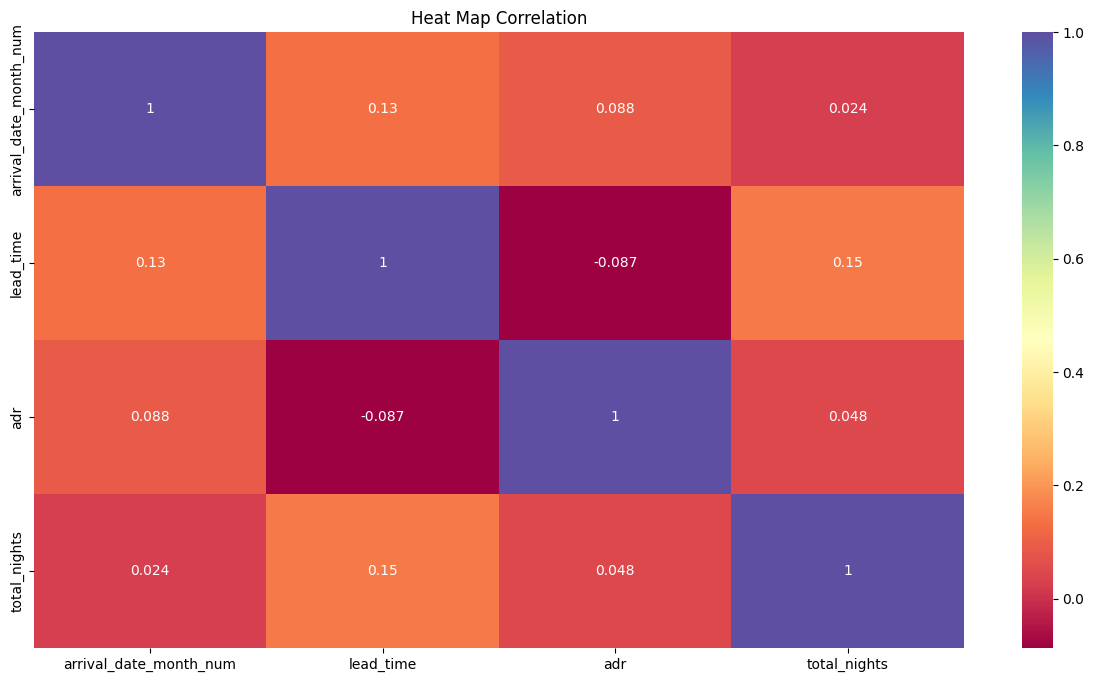

In [29]:
# menjawab nomer 1 dengan visualisasi heatmap
df_clean_1=df_clean[['arrival_date_month_num','lead_time','adr','total_nights']]
df_clean_corr_1=df_clean_1.corr()
plt.figure(figsize=(15,8))
sns.heatmap(df_clean_corr_1,xticklabels=df_clean_corr_1,yticklabels=df_clean_corr_1,annot=True,
            cmap="Spectral").set(title='Heat Map Correlation')
plt.show()

#### **Visualisasi Pertanyaan Nomer 2**

**Tujuan:**
* Mengidentifikasi perkembangan perubahan total lama menginap dari tahun ke tahun

**Hasil:**
* Berdasarkan visualisasi di bawah,ditemukan bahwa dari tahun 2014 sampai 2016 mengalami peningkatan yang signifikan kemudian pada tahun 2017 mengalami penurunan ke sekitar 12500-15000 malam
* Ini kemungkinan menunjukkan kemungkinan adanya faktor baik internal maupun eksternal menyebabkan adanya penurunan

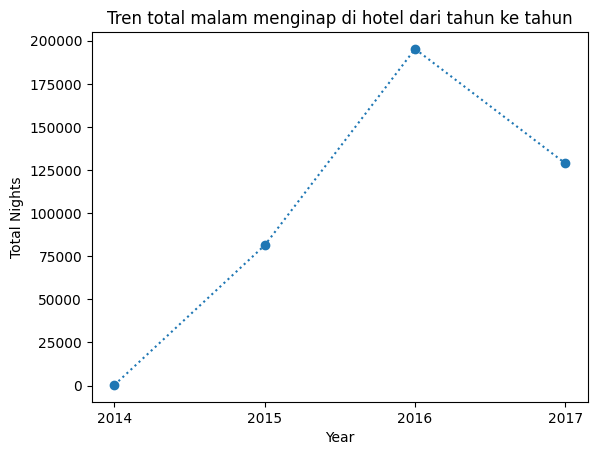

In [30]:
# menjawab nomer 2 dengan visualisasi line chart
yearly_trend = df_clean.groupby('reservation_year').agg(
    total_nights_sum=('total_nights', 'sum'),
    total_bookings=('total_nights', 'count'),
    avg_nights=('total_nights', 'mean')
).reset_index()

plt.plot(yearly_trend['reservation_year'], yearly_trend['total_nights_sum'], marker = 'o', linestyle = 'dotted')

plt.title('Tren total malam menginap di hotel dari tahun ke tahun')
plt.xticks([2014, 2015, 2016, 2017])
plt.xlabel('Year')
plt.ylabel('Total Nights')

plt.show()

#### **Visualisasi Pertanyaan Nomer 3**

**Tujuan:**
* Mengidentifikasi perkembangan perubahan total pemesanan dari tahun ke tahun

**Hasil:**
* Berdasarkan visualisasi di bawah,ditemukan bahwa dari tahun 2014 sampai 2016 mengalami peningkatan yang signifikan kemudian pada tahun 2017 mengalami penurunan ke sekitar 8000-10000 pesanan
* Ini kemungkinan menunjukkan kemungkinan adanya faktor baik internal maupun eksternal menyebabkan adanya penurunan

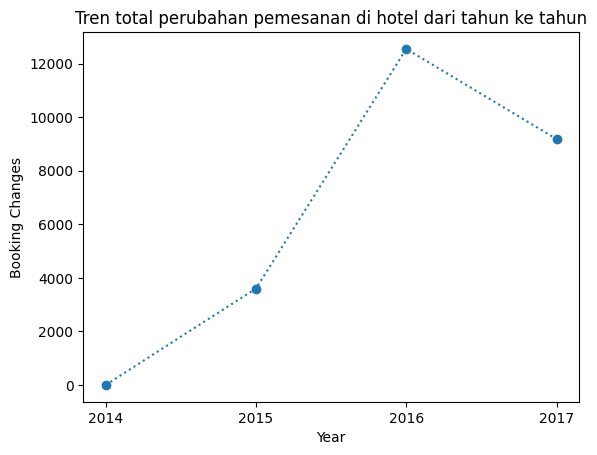

In [31]:
# menjawab nomer 3 dengan visualisasi line chart
yearly_trend = df_clean.groupby('reservation_year').agg(
    booking_changes_sum=('booking_changes', 'sum'),
    booking_changes_count=('booking_changes', 'count'),
    avg_booking_changes=('booking_changes', 'mean')
).reset_index()

plt.plot(yearly_trend['reservation_year'], yearly_trend['booking_changes_sum'], marker = 'o', linestyle = 'dotted')

plt.title('Tren total perubahan pemesanan di hotel dari tahun ke tahun')
plt.xticks([2014, 2015, 2016, 2017])
plt.xlabel('Year')
plt.ylabel('Booking Changes')

plt.show()

#### **Visualisasi Pertanyaan Nomer 4**

**Tujuan:**
- Mengidentfikasi tipe customer yang paling menguntungkan / membawa pendapatan yang paling besar bagi bisnis

**Hasil:**
- Berdasarkan visualisasi di bawah, ditemukan bahwa customer dengan tipe transient (sementara) merupakan kelompok dengan pengeluaran tertinggi dibandingkan tipe lainnya
- Ini menunjukan bahwa tamu yang datang dengan waktu inap singkat memberikan pendapatan yang lebih besar bagi bisnis.

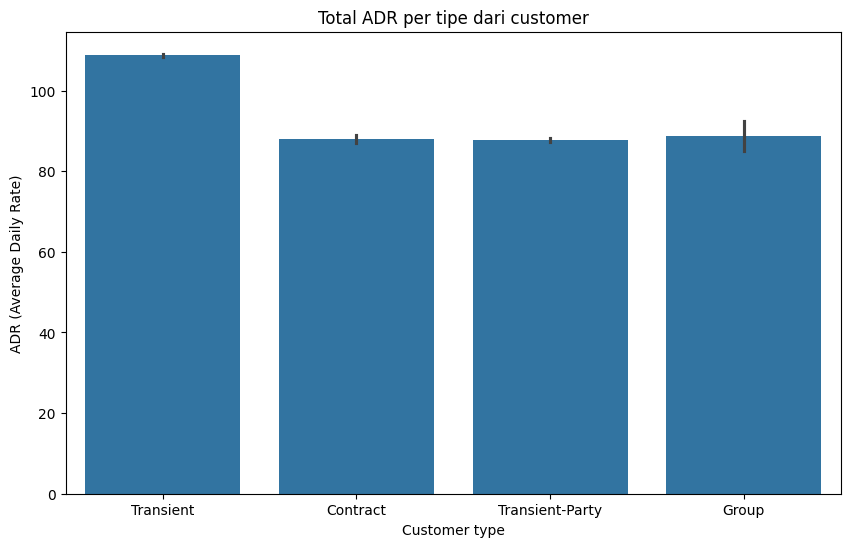

In [32]:
# menjawab nomer 4 dengan visualisasi bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='customer_type', y='adr')
plt.title(f'Total ADR per tipe dari customer')
plt.xlabel('Customer type')
plt.ylabel('ADR (Average Daily Rate)')
plt.show()

#### **Visualisasi Pertanyaan 5**

**Tujuan:**
- Mengidentifikasi karakteristik data yang dapat membedakan antara subjek yang membatalkan reservasi dengan yang tidak

**Hasil:**

- Tidak ditemukan adanya cluster alami yang ditunjukan dengan adanya masih overlap antara yang membatalkan dengan yang tidak.
- Ini menunjukan bahwa variabel atau fitur masih belum mampu untuk memisahkan antara kedua kelompok tersebut secara jelas sehingga tidak bisa membuat cluster yang terpisah

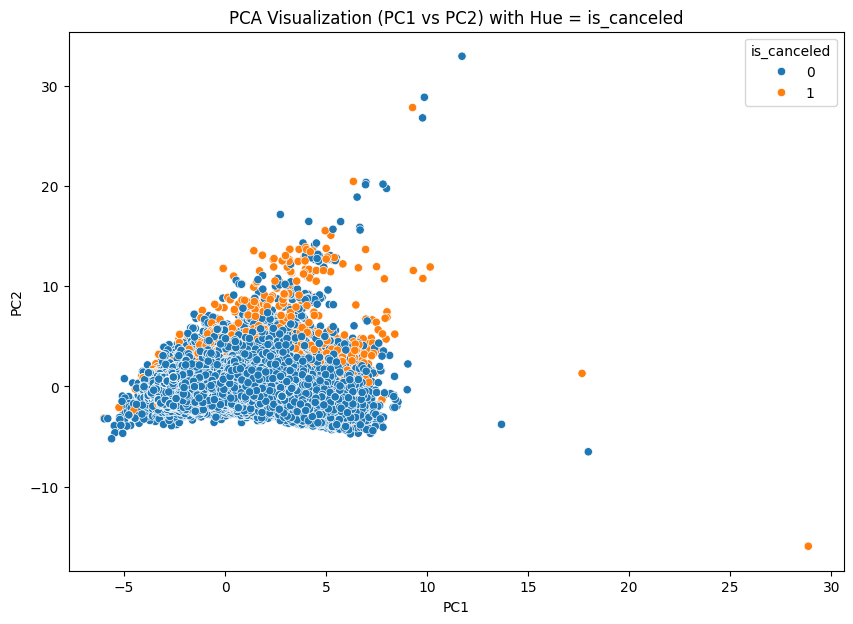

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'is_canceled': y.values
})

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='is_canceled'
)

plt.title("PCA Visualization (PC1 vs PC2) with Hue = is_canceled")
plt.show()

### **Tabel Ringkasan**

In [34]:
df_clean_num=df_clean.drop(columns=['hotel','is_canceled','arrival_date_year','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date','is_family','agent','company','is_business_traveler','has_special_requests','arrival_date_month_num','customer_type_num','reservation_year'])
df_clean_num.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_nights', 'total_guests'],
      dtype='object')

In [35]:
df_clean_num.describe().round(2)

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,total_guests
count,117392.00,117392.00,117392.00,117392.00,117392.00,117392.00,117392.0,117392.00,117392.00,117392.00,117392.00,117392.00,117392.00,117392.00,117392.00,117392.00,117392.00
mean,105.10,27.14,15.80,0.94,2.52,1.86,0.1,0.01,0.09,0.13,0.22,2.34,103.54,0.06,0.57,3.46,1.97
std,106.91,13.58,8.78,0.99,1.89,0.48,0.4,0.10,0.85,1.45,0.63,17.68,49.19,0.25,0.79,2.53,0.65
min,0.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.00,1.00,1.00
25%,19.00,16.00,8.00,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,70.53,0.00,0.00,2.00,2.00
50%,71.00,27.00,16.00,1.00,2.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,95.00,0.00,0.00,3.00,2.00
75%,162.00,38.00,23.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,126.00,0.00,1.00,4.00,2.00
max,709.00,53.00,31.00,19.00,50.00,4.00,10.0,10.00,26.00,72.00,18.00,391.00,5400.00,8.00,5.00,69.00,12.00


In [36]:
dtype_counts = df_clean.dtypes.value_counts().reset_index()
dtype_counts.columns = ['Data Type', 'Count']

dtype_counts['Percentage'] = (
    dtype_counts['Count'] / len(df_clean.columns) * 100
).round(1)

dtype_counts['Cumulative %'] = dtype_counts['Percentage'].cumsum().round(1)

dtype_counts

,Data Type,Count,Percentage,Cumulative %
0,int64,26,65.0,65.0
1,object,11,27.5,92.5
2,float64,1,2.5,95.0
3,datetime64[ns],1,2.5,97.5
4,int32,1,2.5,100.0


In [37]:
len(df_clean)

117392

## **E. Ringkasan & Kesimpulan**

#### **Temuan Utama**

1. Dari visualisasi 1 didapat bahwa korelasi antar kolom bulan, lead time, ADR, dan Total Nights rendah disebabkan nilai korelasi yang tidak mendekati 1 atau -1
2. Dari visualisasi 2 didapat bahwa tren total nights/total malam meningkat dari tahun 2014 sampai 2016 lalu turun pada 2017
3. Dari visualisasi 3 didapat bahwa korelasi antar kolom tipe tamu, lama menginap, dan spending pattern rendah disebabkan nilai korelasi yang tidak mendekati 1 atau -1
4. Dari visualisasi 4 didapat bahwa Tipe customer dengan ADR paling banyak adalah Transient
5. Dari visualisai 5 tidak ditemukan adanya pola cluster alami untuk tamu yang membatalkan booking dan tidak
6. Data reduction dengan initial 119390 baris menjadi 117392 baris dengan menghilangkan 1998 baris yang invalid
7. Handling missing values dengan menghilangkan 4 baris di kolom children, imputasi missing values dengan angka 0 di kolom company dan agent, dan imputasi modus di kolom country
8. Beberapa fitur yang kami buat sendiri berdasarkan fitur yang sudah ada untuk analisis lebih dalam lagi seperti total_nights, total_guests, is_family, is_business_traveler, has_special_requests, arrival_date_month_num, customer_type_num, dan reservation_year

#### **Keterbatasan**

1. Encoding masih belum sesuai jika tujuan dari data wrangling ini akan diteruskan ke modelling khususnya model yang distance based karena tidak menggunakan dummy encoding melainkan label encoding sehingga mungkin model akan bias
2. Variabel kategorik yang cukup banyak sehingga metode encoding sulit diterapkan khususnya metode dummy encoding
3. Handling outliers masih bisa dikembangkan lagi karena memerlukan domain knowledge khususnya di perhotelan

#### **Saran Pengembangan**

1. Mengekstraksi fitur yang lebih bermanfaat untuk tujuan dari data wrangling ini
2. Mencari insight yang lebih dalam dari feature engineering yang tadi dilakukan
3. Menggabungkan domain knowledge dalam pengerjaan tepatnya pada saat validasi data maupung cleaning data agar hasil sesuai dengan kenyataan